## Day 51 Lecture 1 Assignment

PCA Assignment

In [60]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

Load the dataset from https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast-cancer-wisconsin-data.csv

In [61]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast-cancer-wisconsin-data.csv')

In [62]:
cancer = data.copy()
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### 1. Select a basic classifier and build a model on the breast cancer wisconsin dataset. Record the confusion matrix.

In [63]:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [64]:
cancer['diagnosis'] = np.where(cancer['diagnosis'] == 'M', 1, 0)
cancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [65]:
missings = cancer.isna().sum()
missings

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [66]:
cancer.drop(missings.loc[missings>0].index, axis=1, inplace=True)

In [67]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int32
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [68]:
X = cancer.copy().drop('diagnosis', axis=1)
y = cancer['diagnosis']

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=21)

In [70]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=8, random_state=19)
rfc.fit(X_train, Y_train)

predictions = rfc.predict(X_test)

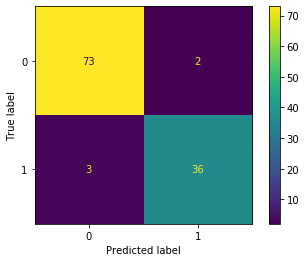

In [71]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc, X_test, Y_test)

### 2. Apply PCA to the features in the dataset, not the target value. Experiment with scaled and unscaled data.

In [72]:
from sklearn.decomposition import PCA
X_pca_unscaled = PCA().fit_transform(X)

pd.DataFrame(X_pca_unscaled).rename(lambda x: 'Component {}'.format(x), axis=1)

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,...,Component 21,Component 22,Component 23,Component 24,Component 25,Component 26,Component 27,Component 28,Component 29,Component 30
0,-2.952953e+07,1176.590041,-294.913581,51.007560,-8.517369,31.505780,1.260652,0.911710,0.131766,0.747230,...,0.021189,0.000247,0.002556,0.011549,0.005773,0.001376,-0.002011,0.001259,0.001979,0.000705
1,-2.952931e+07,1285.749615,14.460640,-33.559074,17.863095,-4.529803,-0.230496,-0.068841,0.178773,-0.484090,...,0.004968,0.021065,0.001538,0.006995,-0.006978,0.001399,0.000010,-0.001329,0.000706,-0.001052
2,5.392907e+07,965.498486,39.839016,-2.959418,4.170464,-0.292485,-2.648031,-0.761458,-0.258809,-0.174983,...,-0.009665,-0.002393,-0.004111,-0.004019,0.000709,-0.003774,0.000139,0.000012,-0.000788,0.000399
3,5.397647e+07,-437.551998,-66.111302,6.675288,-11.771096,7.422798,1.308459,-1.227956,-0.028828,-0.333780,...,0.011639,0.007078,0.001637,0.006927,-0.010261,-0.002874,-0.000158,0.001332,-0.002187,-0.001679
4,5.398657e+07,900.073378,190.054022,-0.136151,8.496560,7.796324,1.027825,-0.304510,0.318231,0.032461,...,-0.009636,0.010272,0.002249,0.002725,0.002455,0.001681,0.003175,0.000285,0.001780,0.000323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-2.944541e+07,1430.693656,109.118664,41.845954,6.605036,-5.553879,-0.405762,-0.839802,-0.016520,-0.447274,...,-0.017580,0.007849,-0.002409,-0.002309,-0.003637,-0.008237,0.002591,0.001317,0.000006,-0.000429
565,-2.944515e+07,1061.599145,76.039711,1.596501,-4.765256,-12.637222,-0.068406,0.408883,0.471842,-0.447077,...,0.010953,-0.001907,-0.003070,-0.007899,0.002905,-0.002529,0.000285,0.001033,-0.000588,-0.000731
566,-2.944488e+07,331.077904,46.814381,-9.307757,-9.776843,-6.244048,-0.872997,-2.185689,-0.468019,-0.094040,...,-0.003727,-0.002258,-0.001318,-0.003872,-0.000921,0.000553,-0.001200,0.000040,0.000514,-0.000272
567,-2.944459e+07,1141.435887,33.042719,-17.982016,-23.623079,3.480587,4.085244,-1.713966,-0.376612,0.387776,...,-0.006063,-0.010805,0.005837,0.001124,-0.002646,0.001862,0.002698,0.001278,-0.000779,0.001223


In [73]:
scaler = StandardScaler()

X_std = scaler.fit_transform(X)

X_std_pca_model = PCA().fit(X_std)
X_std_pca = PCA().fit_transform(X_std)

pd.DataFrame(X_std_pca).rename(lambda x: 'Component {}'.format(x), axis=1)

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,...,Component 21,Component 22,Component 23,Component 24,Component 25,Component 26,Component 27,Component 28,Component 29,Component 30
0,9.183200,1.971271,-1.171625,3.639332,-1.193098,-1.372280,0.371844,2.180529,-0.231610,-0.090396,...,0.107371,0.069634,0.085232,-0.175628,-0.150774,-0.200807,-0.253193,-0.033911,0.045572,-0.047166
1,2.383298,-3.753459,-0.580229,1.127438,0.624850,-0.126616,-0.288270,0.044935,0.426916,-0.659939,...,-0.075191,-0.091740,-0.213925,0.010368,-0.170210,-0.042420,0.180649,0.032630,-0.005902,-0.001845
2,5.742472,-1.080350,-0.533088,0.903470,-0.180601,-0.401855,0.463188,-0.715209,-0.010712,-0.082305,...,0.303285,-0.058930,-0.074145,0.103834,0.170749,0.005066,0.049887,0.047022,0.003290,0.000735
3,7.124384,10.272225,-3.150161,0.121512,-2.968055,-2.561668,1.950177,1.287990,1.272638,-1.171376,...,0.410865,-0.205120,-0.135322,0.158659,0.075684,-0.273048,0.184350,0.042465,-0.068640,-0.020001
4,3.945694,-1.959689,1.401177,2.937555,0.540853,1.233300,-0.205435,-0.959329,0.629119,-0.166354,...,-0.117341,-0.020423,0.135431,-0.004874,0.002884,0.039637,0.032586,-0.034790,0.005183,0.021199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.435329,-3.565358,2.399112,1.197814,-0.071089,2.028789,-1.345195,-0.522454,-0.184012,1.045677,...,-0.003622,-0.066673,0.095882,0.103981,0.220658,-0.125982,0.157187,0.009872,0.006427,-0.001343
565,3.789458,-3.573419,2.029505,-2.478688,-0.498521,-0.080422,-1.024112,-0.585571,-0.949736,-0.258745,...,-0.015842,0.020246,-0.052038,0.084901,0.001469,0.065256,-0.068855,-0.023569,-0.027724,-0.010393
566,1.251890,-1.893977,0.534467,-2.077633,1.814829,0.394713,-0.437806,-0.178668,0.262115,0.475977,...,-0.034742,0.066353,-0.194739,-0.046087,0.003028,0.005870,-0.024499,-0.002568,0.006340,0.003808
567,10.365035,1.696398,-1.907418,-2.351807,-0.028220,-0.656720,-0.195264,0.275202,-0.072776,-0.518180,...,0.144203,-0.043177,0.167435,-0.195978,0.378311,-0.198640,-0.028287,-0.068083,-0.084302,-0.023763


These feature spaces have VERY different values from each other. We will use standardization for sure.


### 3. Identify the number of principal components required to explain 90% of the data.

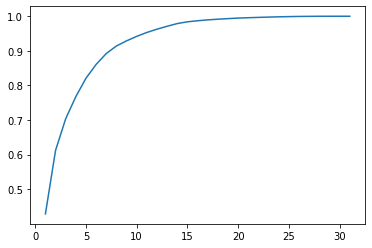

In [74]:
explained_variances = pd.Series(np.cumsum(X_std_pca_model.explained_variance_ratio_)).rename(lambda x: x+1, axis=0)

plt.plot(explained_variances)

In [75]:
variance_threshold = .9
crossover_index = explained_variances.loc[explained_variances > variance_threshold].index[0]


print('number of components needed to explain 90 percent of variance:', crossover_index)

number of components needed to explain 90 percent of variance: 8


### 4. Compare the results with your original model.

In [76]:
X_pca_std = PCA(n_components = crossover_index).fit_transform(X_std)

X_train, X_test_pca, Y_train, Y_test_pca = train_test_split(X_pca_std, y, test_size=.2, random_state=21)

rfc_pca = RandomForestClassifier(max_depth=8, random_state=19)
rfc_pca.fit(X_train, Y_train)
pca_predictions = rfc_pca.predict(X_test_pca)

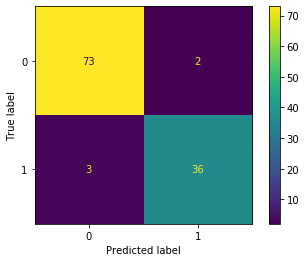

In [78]:
plot_confusion_matrix(rfc_pca, X_test_pca, Y_test_pca)

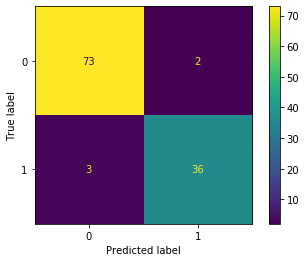

In [79]:
# Plot the original confusion matrix again to compare
plot_confusion_matrix(rfc, X_test, Y_test)

We see that the PCA rfc model and the rfc model using the true feature space yielded the exact same confusion matrix, even though the PCA version only used 1/4 of the features.